# Multivariate Regression

Small data set of Blue Book car values:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
pd.options.display.max_columns = 100

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
#General statistic information
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,804,NaN,NaN,NaN,21343.1,9884.85,8638.93,14273.1,18025,26717.3,70755.5
Mileage,804,NaN,NaN,NaN,19831.9,8196.32,266,14623.5,20913.5,25213,50387
Make,804,6,Chevrolet,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,804,32,Cavalier,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trim,804,47,Sedan 4D,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,804,5,Sedan,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cylinder,804,NaN,NaN,NaN,5.26866,1.38753,4,4,6,6,8
Liter,804,NaN,NaN,NaN,3.03731,1.10556,1.6,2.2,2.8,3.8,6
Doors,804,NaN,NaN,NaN,3.52736,0.850169,2,4,4,4,4
Cruise,804,NaN,NaN,NaN,0.752488,0.431836,0,1,1,1,1


In [5]:
#Check if ther is correlation between doors & price
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

More doors does not mean a higher price.
We skip this feature in the analyses

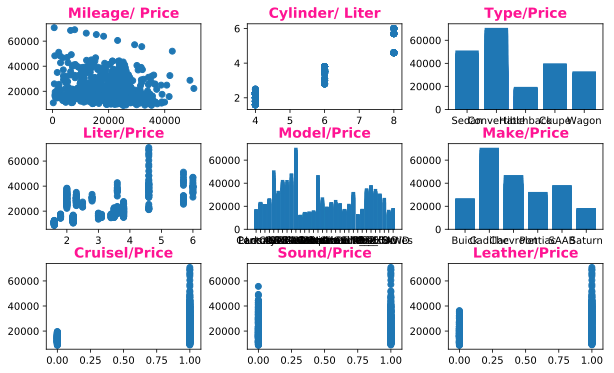

In [19]:
fig, ax = plt. subplots(nrows=3, ncols=3)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()
title_font = {
    'fontsize': 14,
    'color': '#FF1493',
    'fontweight': 'bold'
}
ax1.scatter(df['Mileage'], df['Price'])
ax1.set_title('Mileage/ Price', fontdict=title_font)
ax2.scatter(df['Cylinder'], df['Liter'])
ax2.set_title('Cylinder/ Liter', fontdict=title_font)
ax3.bar(df['Type'], df['Price'])
ax3.set_title('Type/Price', fontdict=title_font)
ax4.scatter(df['Liter'], df['Price'])
ax4.set_title('Liter/Price', fontdict=title_font)
ax5.bar(df['Model'], df['Price'])
ax5.set_title('Model/Price', fontdict=title_font)
ax6.bar(df['Make'], df['Price'])
ax6.set_title('Make/Price', fontdict=title_font)
ax7.scatter(df['Cruise'], df['Price'])
ax7.set_title('Cruisel/Price', fontdict=title_font)
ax8.scatter(df['Sound'], df['Price'])
ax8.set_title('Sound/Price', fontdict=title_font)
ax9.scatter(df['Leather'], df['Price'])
ax9.set_title('Leather/Price', fontdict=title_font)

fig.set_size_inches(10, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

Visually there is no obviouse correlation between Mileage & price.

Features Cylinder & Liter are highly correlated. In prediction we can use only Liter feature.

Type & Make is the feature we can use. As option we can use it as dumps or take mean price.

Model have many variances. Not easy to use this feature.

Cruise, Sound & Leather features won't work good on Linear regressions

In [12]:
#Calculate mean prices for Type & Make
mean_price_type = df.groupby(['Type'])['Price'].mean().reset_index()
mean_price_type.columns =['Type', 'mean_price_type']
mean_price_type

,Type,mean_price_type
0,Convertible,40831.705847
1,Coupe,17726.931831
2,Hatchback,14170.927809
3,Sedan,21067.927487
4,Wagon,22859.245356


In [13]:
mean_price_make = df.groupby(['Make'])['Price'].mean().reset_index()
mean_price_make.columns =['Make', 'mean_price_make']
mean_price_make

,Make,mean_price_make
0,Buick,20815.113883
1,Cadillac,40936.335448
2,Chevrolet,16427.599348
3,Pontiac,18412.100422
4,SAAB,29494.704687
5,Saturn,13978.807560


In [14]:
#merge tables with mean prices
df = pd.merge(df, mean_price_type, how = 'left', on =['Type'])
df = pd.merge(df, mean_price_make, how = 'left', on =['Make'])
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,mean_price_type,mean_price_make
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,21067.927487,20815.113883
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,21067.927487,20815.113883
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,21067.927487,20815.113883
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,21067.927487,20815.113883
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,21067.927487,20815.113883


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.
Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [20]:
scale = StandardScaler()

X = df[['Liter', 'mean_price_type', 'mean_price_make']]
y = df['Price']

X[['Liter', 'mean_price_type', 'mean_price_make']] = scale.fit_transform(X[['Liter', 'mean_price_type', 'mean_price_make']].as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

        Liter  mean_price_type  mean_price_make
0    0.056736        -0.050277        -0.066571
1    0.056736        -0.050277        -0.066571
2    0.056736        -0.050277        -0.066571
3    0.056736        -0.050277        -0.066571
4    0.056736        -0.050277        -0.066571
5    0.056736        -0.050277        -0.066571
6    0.056736        -0.050277        -0.066571
7    0.056736        -0.050277        -0.066571
8    0.056736        -0.050277        -0.066571
9    0.056736        -0.050277        -0.066571
10   0.509277        -0.050277        -0.066571
11   0.509277        -0.050277        -0.066571
12   0.509277        -0.050277        -0.066571
13   0.509277        -0.050277        -0.066571
14   0.509277        -0.050277        -0.066571
15   0.509277        -0.050277        -0.066571
16   0.509277        -0.050277        -0.066571
17   0.509277        -0.050277        -0.066571
18   0.509277        -0.050277        -0.066571
19   0.509277        -0.050277        -0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     48.55
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           7.80e-29
Time:                        21:54:53   Log-Likelihood:                -9166.4
No. Observations:                 804   AIC:                         1.834e+04
Df Residuals:                     801   BIC:                         1.835e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Liter            3870.5302    788.607      4.908      0.000    2322.549    5418.512
mean_price_type  3139.9038    817.666      3.840      0.000    1534.882    4744.926
mean_price_make  5871.4336    841.530      6.977      0.000    4219.570    7523.298
==============================================================================
Omnibus:                      148.772   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.380
Skew:                           0.923   Prob(JB):                     1.16e-92
Kurtosis:                       6.038   Cond. No.                         1.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""